Predictive analytics is a powerful approach for extracting insights from data and guiding data-informed decision-making. In this notebook, I delve into predictive analysis using a Twitter dataset as the foundation. My primary focus is on predicting "Engagements," a critical metric in the realm of social media. Engagements encompass various interactions with content, such as likes, shares, reactions, and comments. These interactions signify how many individuals have not only viewed but actively engaged with the content. I leverage the carefully selected features retained throughout my analysis to achieve these predictions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/user/Downloads/DiceyTechHack"
data = pd.read_csv(path +"/TwitterData.csv")

In [3]:
data.head(2)

,Date,Content Type,Sent by,Post,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,...,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags
0,7/13/2023 10:57,Photo,Sophia Amuka,Your money should not be a gamble. Before you ...,445,345718,0.04,16,4,2,...,1,0,7,1,0,0,0,0,1,CIB Posts
1,7/12/2023 20:03,Text,Blessing Ubah,"What skill (s) do you have, that no one ever t...",2961,347102,0.02,52,11,20,...,0,1,12,5,0,0,0,0,0,Other


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["PostHour"] = data["Date"].dt.hour
data["PostMonth"] = data["Date"].dt.month_name()
data["PostYear"] = data["Date"].dt.year
data["num_post_words"] = data["Post"].str.len()

In [6]:
data.isnull().sum()

Date                                0
Content Type                        0
Sent by                             0
Post                                0
Impressions                         0
Potential Reach                     0
Engagement Rate (per Impression)    0
Engagements                         0
Likes                               0
Comments                            0
Shares                              0
Click-Through Rate                  0
Post Link Clicks                    0
Other Post Clicks                   0
Post Clicks (All)                   0
Post Media Clicks                   0
Post Hashtag Clicks                 0
Post Detail Expand Clicks           0
Profile Clicks                      0
Other Engagements                   0
Follows from Post                   0
Unfollows from Post                 0
Video Views                         0
Media Views                         0
Tags                                0
PostHour                            0
PostMonth   

In [7]:
data.drop("Post", axis=1, inplace=True)
data.drop("Date", axis=1, inplace=True)

In [8]:
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 23 numeric and 4 categorical columns in train data


In [9]:
corr = numeric_data.corr()
print(corr["Engagements"].sort_values(ascending = False))

Engagements                         1.000000
Shares                              0.794180
Post Clicks (All)                   0.788661
Other Post Clicks                   0.783188
Post Detail Expand Clicks           0.722001
Profile Clicks                      0.690390
Likes                               0.685341
Post Media Clicks                   0.663444
Engagement Rate (per Impression)    0.620985
Impressions                         0.620083
Media Views                         0.558331
Comments                            0.511319
Follows from Post                   0.439406
Post Hashtag Clicks                 0.299797
Potential Reach                     0.268379
Post Link Clicks                    0.223236
Other Engagements                   0.116877
Video Views                         0.101811
PostHour                            0.052568
Click-Through Rate                  0.048812
PostYear                            0.028252
num_post_words                      0.025635
Unfollows 

In [10]:
X = data.drop(["Engagements"],axis=1)
y = data["Engagements"]

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

def processing_data(dataa):
     processed_data = data.copy()

     categ = ["Content Type",
              "Sent by",
              "Tags",
              "PostMonth"]
    
     for col in categ:
        processed_data[col] = le.fit_transform(processed_data[col])

     return pd.DataFrame(processed_data, columns = processed_data.columns) 

In [13]:
processed_X = processing_data(X)

In [14]:
processed_X.shape

(8529, 27)

In [15]:
processed_X.head(2)

,Content Type,Sent by,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,...,Other Engagements,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags,PostHour,PostMonth,PostYear,num_post_words
0,1,11,445,345718,0.04,16,4,2,1,0.0,...,0,0,0,0,1,41,10,5,2023,299
1,2,2,2961,347102,0.02,52,11,20,3,0.0,...,0,0,0,0,0,76,20,5,2023,89


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression,RFE
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

In [17]:
X_train,X_test,y_train,y_test = train_test_split(processed_X,y,test_size=0.2,random_state=42)

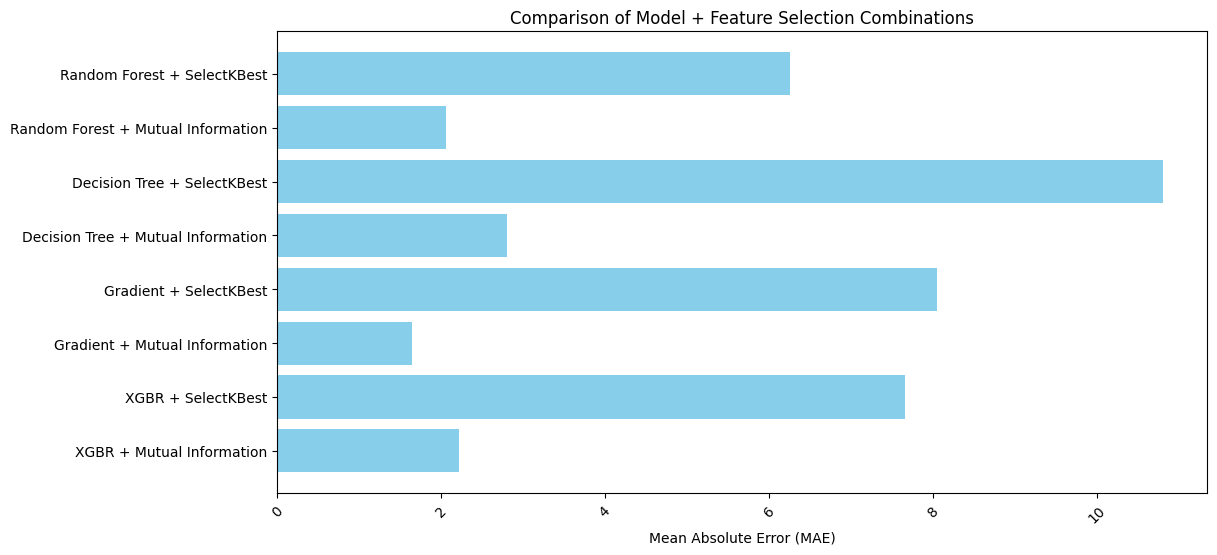

In [18]:
models = {
          "Random Forest":RandomForestRegressor(random_state=42),
          "Decision Tree":DecisionTreeRegressor(random_state=42),
          "Gradient":GradientBoostingRegressor(random_state=42),
          "XGBR":XGBRegressor(random_state=42)
          } 

methods = {
    'SelectKBest': SelectKBest(f_regression, k=25),
    'Mutual Information': SelectKBest(mutual_info_regression, k=25)
}

results = {}

for model_name, model in models.items():
    for method_name, method in methods.items():
        X_selected = method.fit_transform(X_train, y_train)
        X_test_selected = method.transform(X_test)
        
        model.fit(X_selected, y_train)
        y_pred = model.predict(X_test_selected)
        
        mae = mean_absolute_error(y_test, y_pred)
        results[f"{model_name} + {method_name}"] = mae

results_df = pd.DataFrame(list(results.items()), columns=['Combination', 'MAE'])

plt.figure(figsize=(12, 6))
plt.barh(results_df['Combination'], results_df['MAE'], color='skyblue')
plt.xlabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.title('Comparison of Model + Feature Selection Combinations')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

In [19]:
k = 25
selector = SelectKBest(score_func=mutual_info_regression,k=k)
X_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)

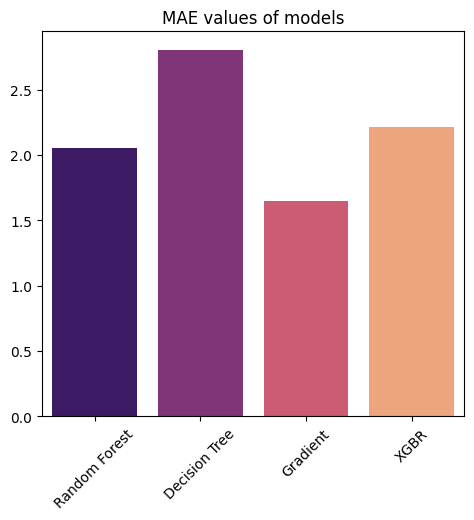

In [20]:
models = {
          "Random Forest":RandomForestRegressor(random_state=42),
          "Decision Tree":DecisionTreeRegressor(random_state=42),
          "Gradient":GradientBoostingRegressor(random_state=42),
          "XGBR":XGBRegressor(random_state=42)
          } 
mae_values= []

for name, model in models.items():
     model.fit(X_selected,y_train)
     preds = model.predict(X_test_selected)
     accuracy =mean_absolute_error(y_test,preds)
     mae_values.append(accuracy)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.barplot(x= list(models.keys()), y = mae_values, palette = "magma")
plt.title("MAE values of models")
plt.xticks(rotation=45)
plt.show()

In [24]:
gb = GradientBoostingRegressor()
gb.fit(X_selected,y_train)
y_pred = gb.predict(X_test_selected)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE of Random Forest is {mae:.4f}")

MAE of Random Forest is 2.2019
